# Session 4: Convolutional Neural Networks and Filters

This notebook contains structured tasks based on Session 4 materials.

**Instructions:**
- Do NOT use a separate `.py` file. Complete all tasks directly in this notebook.
- Keep your code clear and well-commented.
- For Visulaization, please use `%matplotlib inline`
- Submit your completed notebook by uploading it to your forked repository.

### ***DO NOT UPLOAD THE DATASET TO GITHUB as it's too large***
<hr>

## Task 1: Convolutional Filters on an Image
Apply several 2D filters (Sobel X, Sobel Y, Laplacian, and Sharpen) to an image and visualize the results side by side.

**Hint:**
- Use OpenCV (`cv2.filter2D`) or NumPy to apply kernels.
- Define common kernels (Sobel, Laplacian, Sharpen).
- Use `matplotlib.pyplot` to plot the original and filtered images.

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install matplotlib

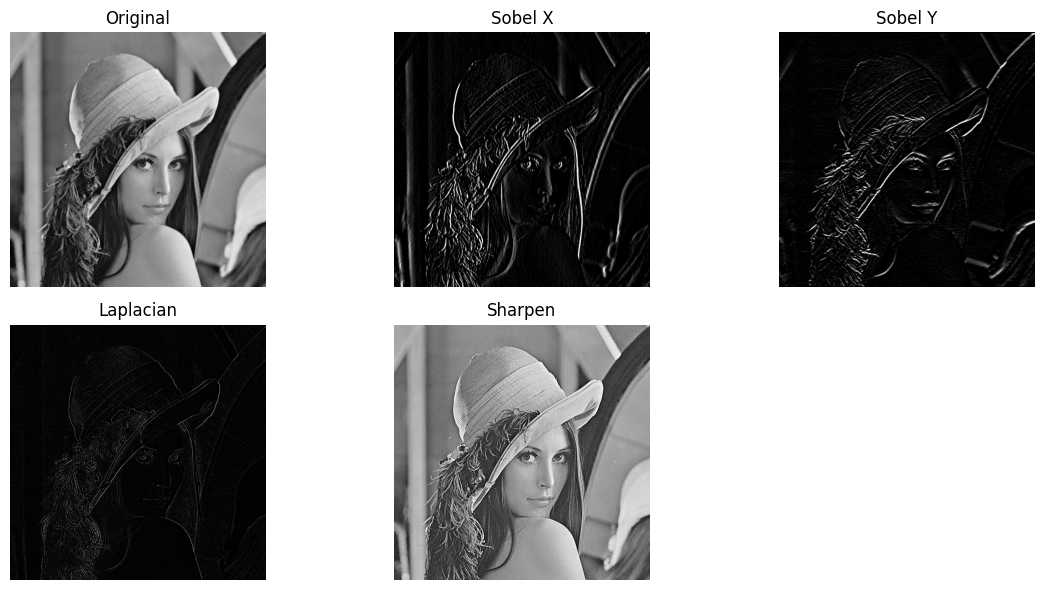

In [13]:
# TODO: Load an image (use OpenCV or matplotlib)
img= cv2.imread('sample.jpg',0)
# TODO: Define Sobel, Laplacian, and Sharpen kernels
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)
sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)
laplacian = np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]], dtype=np.float32)
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]], dtype=np.float32)  

# TODO: Apply each filter to the image
sobel_x_img = cv2.filter2D(img, -1, sobel_x)
sobel_y_img = cv2.filter2D(img, -1, sobel_y)
laplacian_img = cv2.filter2D(img, -1, laplacian)
sharpen_img = cv2.filter2D(img, -1, sharpen)

# TODO: Plot results in a grid using matplotlib
titles = ["Original", "Sobel X", "Sobel Y", "Laplacian", "Sharpen"]
images = [img, sobel_x_img, sobel_y_img, laplacian_img, sharpen_img]

plt.figure(figsize=(12, 6))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


## Task 2: Build a Simple CNN on FashionMNIST
Construct and train a small Convolutional Neural Network (CNN) on the FashionMNIST dataset.

**Hint:**
- Use `torchvision.datasets.FashionMNIST` for loading data.
- Define a small CNN with `nn.Conv2d`, `nn.ReLU`, `nn.MaxPool2d`, and `nn.Linear`.
- Train for a few epochs using an optimizer (e.g., Adam) and loss function (e.g., CrossEntropyLoss).
- Print training accuracy after each epoch.

In [14]:
# TODO: Import torch, torchvision, and related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader

# TODO: Load FashionMNIST dataset with transforms
data_transform = transforms.ToTensor()
train_data = FashionMNIST(root='./data', train=True, download=True, transform=data_transform)
test_data = FashionMNIST(root='./data', train=False,download=True, transform=data_transform)
train_loader = DataLoader(train_data, batch_size=20, shuffle=True)
test_loader = DataLoader(test_data, batch_size=20, shuffle=False)

# TODO: Define a simple CNN class with one conv layer and one fc layer
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)   
        self.pool = nn.MaxPool2d(2, 2)                          
        self.fc1 = nn.Linear(8 * 14 * 14, 10)                   

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)   # flatten
        x = self.fc1(x)
        return x

model = Net()
# TODO: Set up optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# TODO: Implement a short training loop (2-3 epochs)
loss_over_time = [] 
epochs = 3
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for batch_i, (inputs, labels) in enumerate(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if (batch_i + 1) % 100 == 0:
                avg_loss = running_loss / 100
                loss_over_time.append(avg_loss)
                print(f"Epoch {epoch+1}, Batch {batch_i+1}, Avg. Loss: {avg_loss:.4f}")
                running_loss = 0.0

print("Finished Training ")
print(loss_over_time)


Epoch 1, Batch 100, Avg. Loss: 1.3342
Epoch 1, Batch 200, Avg. Loss: 0.6732
Epoch 1, Batch 300, Avg. Loss: 0.6433
Epoch 1, Batch 400, Avg. Loss: 0.5633
Epoch 1, Batch 500, Avg. Loss: 0.5544
Epoch 1, Batch 600, Avg. Loss: 0.5498
Epoch 1, Batch 700, Avg. Loss: 0.5141
Epoch 1, Batch 800, Avg. Loss: 0.4853
Epoch 1, Batch 900, Avg. Loss: 0.4642
Epoch 1, Batch 1000, Avg. Loss: 0.4933
Epoch 1, Batch 1100, Avg. Loss: 0.4631
Epoch 1, Batch 1200, Avg. Loss: 0.4747
Epoch 1, Batch 1300, Avg. Loss: 0.4695
Epoch 1, Batch 1400, Avg. Loss: 0.4312
Epoch 1, Batch 1500, Avg. Loss: 0.4573
Epoch 1, Batch 1600, Avg. Loss: 0.4717
Epoch 1, Batch 1700, Avg. Loss: 0.4242
Epoch 1, Batch 1800, Avg. Loss: 0.4467
Epoch 1, Batch 1900, Avg. Loss: 0.4281
Epoch 1, Batch 2000, Avg. Loss: 0.4290
Epoch 1, Batch 2100, Avg. Loss: 0.4356
Epoch 1, Batch 2200, Avg. Loss: 0.4454
Epoch 1, Batch 2300, Avg. Loss: 0.4308
Epoch 1, Batch 2400, Avg. Loss: 0.4250
Epoch 1, Batch 2500, Avg. Loss: 0.4146
Epoch 1, Batch 2600, Avg. Loss: 0.

## Task 3: Visualize Feature Maps
Visualize feature maps produced by the first convolutional layer of your CNN.

**Hint:**
- Take a single image from the test set.
- Pass it through the first convolutional layer (`net.conv1`).
- Convert the output to NumPy and plot several channels as images.

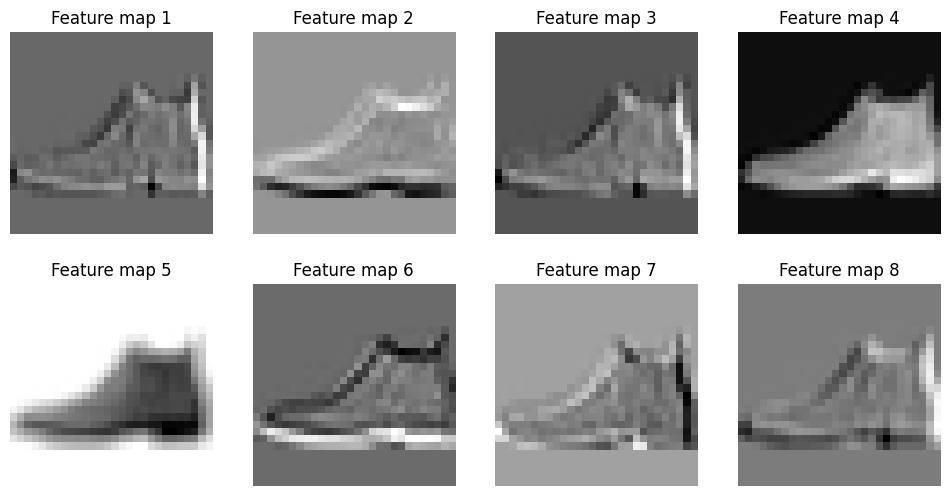

In [15]:
# TODO: Take one test image
dataiter = iter(test_loader)
images, labels = next(dataiter) 
image = images[0].unsqueeze(0)   
# TODO: Forward pass through the first convolutional layer
with torch.no_grad():
    conv_output = model.conv1(image)
# TODO: Convert feature maps to NumPy array
feature_maps = conv_output.squeeze(0).numpy()
# TODO: Plot the first few feature maps in a grid
num_maps_to_plot = min(8, feature_maps.shape[0])
plt.figure(figsize=(12, 6))
for i in range(num_maps_to_plot):
    plt.subplot(2, 4, i+1)
    plt.imshow(feature_maps[i], cmap='gray')
    plt.title(f'Feature map {i+1}')
    plt.axis('off')
plt.show()

In [1]:
import sys
print(sys.executable)
from backports import lzma
import torch, torchvision
print(torch.__version__, torchvision.__version__)


/Users/salmafarida/.pyenv/versions/3.9.6/bin/python
2.2.2 0.17.2


## Task 4: Haar Cascade Face Detection

Apply Haar Cascade classifiers for basic object detection (faces).

**Hint:**
- Use `cv2.CascadeClassifier` with a pre-trained XML file (e.g., `haarcascade_frontalface_default.xml`).
- Convert the input image to grayscale before detection.
- Use `detectMultiScale` to get bounding boxes.
- Draw rectangles on detected faces with `cv2.rectangle`.
- Visualize with Matplotlib.


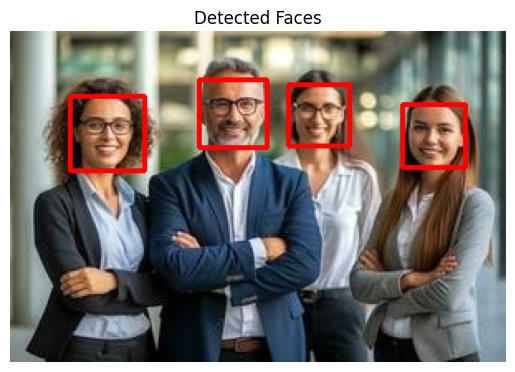

In [16]:
# TODO: Load an image containing a face
img = cv2.imread("faces.jpg") 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# TODO: Load Haar Cascade XML (frontal face) 
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# TODO: Apply detectMultiScale to find faces
faces = face_cascade.detectMultiScale(gray,scaleFactor=1.1, minNeighbors=5,minSize=(30, 30))

# TODO: Draw bounding boxes on the original image
for (x, y, w, h) in faces:
     cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)

# TODO: Display results with matplotlib
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Detected Faces")
plt.show()

